# Description du logiciel 

Dans ce TP, nous allons utiliser le logiciel R, et pour ceci nous utiliserons toujours le service jupyter de l'Université Paris Saclay ce qui nous permettra d'éviter les problèmes d'intallation et de compatibilités, si cependant vous voulez installer R en local sur votre ordinateur, allez regarder à la fin du TP quelques explications y sont fournies.

R est un logiciel bien adapté pour la manipulation et l'analyse des
données, les calculs matriciels, l'utilisation de méthodes statistiques
classiques et avancées, et les représentations graphiques. C'est
également un langage de programmation performant et simple à utiliser.
Il dispose de fonctions prédéfinies et permet d'écrire ses propres
fonctions.

Pour référence, il vous est conseiller d'utiliser le pdf suivant qui recense les commandes R principales qui vont vous être utiles pendant ce TP:
http://revue.sesamath.net/IMG/pdf/RCarte_Commandes-R.pdf

Dans Jupyter, pour executer une cellule de code, commencez par cliquer sur la cellule voulue pui appuyez sur "Shift+Entré" ou sur "Run" ou "Executer" en haut de la page. 

Executez la cellule suivante pour télécharger la base de donées que nous allons utiliser pour ce TP.

In [ ]:
# Téléchargement de la base de données
system("wget https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv", intern=T)
# base de données fournie par UCI repository, un dépos contenant de nombreuses base de données consultable 
# librement pour la recherche et l'enseignement.

# Statistiques descriptives sur les feux de forêt

L'étude d'un jeu de données comprend toujours une phase d'exploration.
Quand celle-ci se fait par variable ou par couple de variables, on parle
d'analyse descriptive. L'analyse descriptive comprend le calcul de
résumés numériques et le tracé de graphes pertinents. Ces deux points vont être vus dans ce TP.

### Objectifs du TP

1. Savoir manipuler des variables qualitatives et quantitatives avec R;
2. Effectuer des représentations graphiques pertinentes.


Pour introduire ces outils d'étude descriptive, nous allons regarder une base de données réelle décrivant des feux de forêts enregistrés dans la région nord-est du Portugal

In [1]:
# Import de la base de données
df = read.table('forestfires.csv', sep=',', header=T, stringsAsFactors = T)

![](https://pixabay.com/get/52e3d74b4d52b10ff3d89960c62e367e1d36deed5354_640.jpg)
                                                                                     

In [2]:
# Imprimer à l'écran les 6 premières lignes de la base de données
head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


Le site fournissant les données nous indique la description suivante des variables:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

Les résumés numériques comme les graphiques dépendent du type de données
manipulées (variable qualitative, variable quantitative). Les deux types
de variables apparaissent dans le jeu de données proposé.

**Remarque** 
> à tout moment, vous pouvez accéder au manuel d'utilisation de R. Pour ce faire, utiliser ?nom_de_la_commande, par exemple pour la fonction `head`, on a la page de manuel suivante :

In [3]:
?head

Cette commande ne nous donne qu'un aperçus de la base de données. Utiliser la commande `dim` pour savoir la taille totale de la base de donnée

In [4]:
dim(df)

[1] 517  13

La commande suivante donne un résumé de la base de données. Nous allons décortiquer ce résumé tout au long du TP et un des buts de ce TP est que vous puissiez comprendre le résultat de la commande `summary` à la fin du TP.

In [6]:
summary(df)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

## Variables qualitatives

Une variable qualitative représente une propriété de l'individu observé
et prend ses valeurs dans un ensemble fixé de cardinal fini. On parle de
variable **nominale** ou **catégorielle**, ou de
**facteur**. Les valeurs autorisées sont appelées **niveaux**
ou **modalités**. Les variables `day` et `month` sont
des variables nominales codées sous forme d'un caractère. De plus, elles
sont de la classe `factor`, ce qui leur confère quelques attributs
supplémentaires, comme la liste des niveaux autorisés.


In [7]:
class(df$day)

[1] "factor"

In [8]:
levels(df$day)

[1] "fri" "mon" "sat" "sun" "thu" "tue" "wed"

### Indicateurs

Un résumé approprié est la table de comptage , qui répertorie le nombre d'individus par
niveau du facteur.

In [9]:
table(df$day)


fri mon sat sun thu tue wed 
 85  74  84  95  61  64  54 

Remarquez que les facteurs ne sont pas dans l'ordre, puisqu'ils ont été détectés automatiquement. Pour les remettre dans l'ordre, on doit les redéfinir

In [10]:
df$day = factor(df$day, level=c('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'))

In [11]:
table(df$day)


mon tue wed thu fri sat sun 
 74  64  54  61  85  84  95 

In [12]:
df$month = factor(df$month, level=c('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'nov', 'dec'))

In [13]:
table(df$day, df$month)

     
      jan feb mar apr may jun jul aug sep nov dec
  mon   0   3  12   1   0   3   4  15  28   0   4
  tue   0   2   5   0   0   0   6  28  19   1   1
  wed   0   1   4   1   0   3   3  25  14   0   1
  thu   0   1   5   2   0   2   3  26  21   0   1
  fri   0   5  11   1   1   3   3  21  38   0   1
  sat   1   4  10   1   1   2   8  29  25   0   0
  sun   1   4   7   3   0   4   5  40  27   0   1

### Graphiques

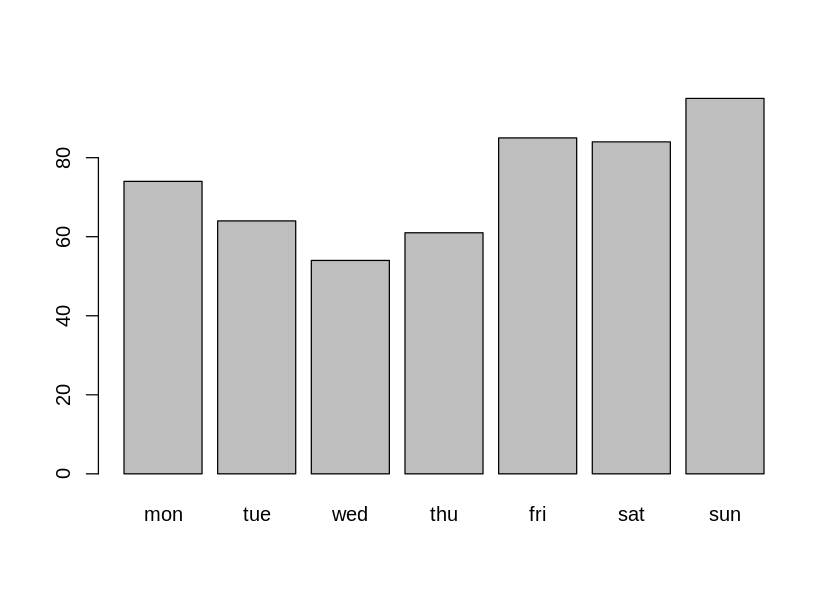

In [34]:
plot(df$day)

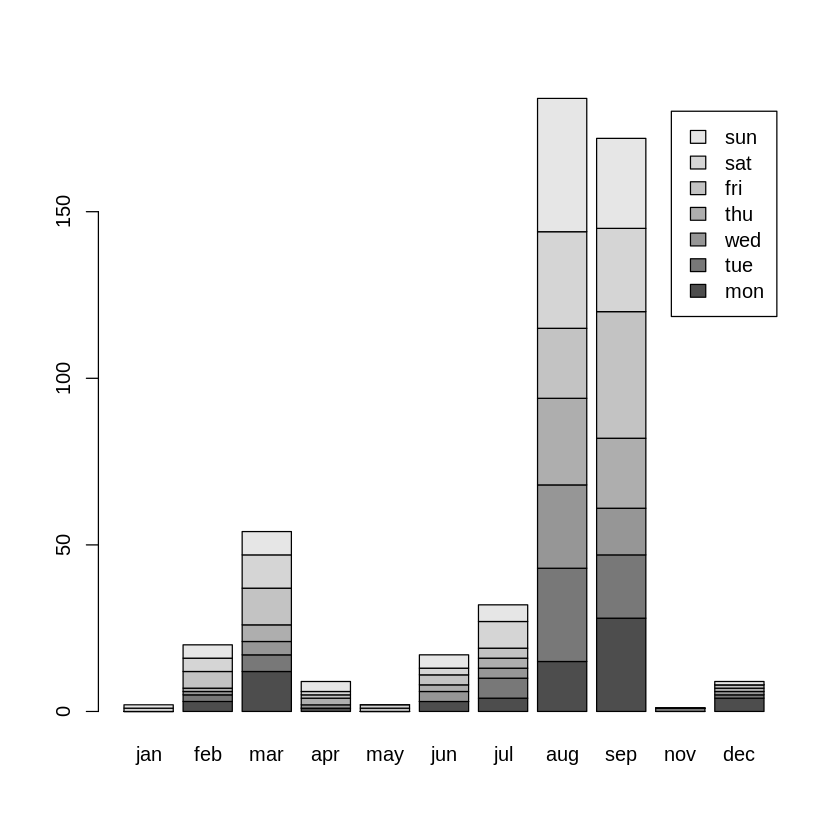

In [15]:
counts <- table(df$day, df$month)
barplot(counts,legend = rownames(counts)) 

## Variables quantitatives

Une variable est quantitative quand elle est numérique et que son
utilisation pour des calculs fait sens: une mesure physique, une valeur
économique... 

On peut penser à une notion de grandeur continue,
bien que de fait, on n'observe cette grandeur qu'avec un certain nombre
de chiffres significatifs. Elle peut parfois être discrète, i.e. prendre
un (relativement) petit nombre de valeurs: les tailles en cm ou le
nombre d'ouragan dans une année par exemple.

### Indicateurs de tendance centrale

In [39]:
# On se restreint à l'étude des variables quantitatives
df_numeric = Filter(is.numeric, df)

In [38]:
c(mean(df$temp), median(df$temp))

[1] 18.88917 19.30000

#### Question

Affichez la moyenne et la médiane de toutes les variables quantitatives du jeu de  données. Y a-t-il une variable où la différence entre médiane et moyenne est significative ? Quelle en est la raison ? 

In [46]:
for (variable in colnames(df_numeric)){
    print(variable)
  print(c(mean(df_numeric[[variable]]), median(df_numeric[[variable]])))}

[1] "X"
[1] 4.669246 4.000000
[1] "Y"
[1] 4.299807 4.000000
[1] "FFMC"
[1] 90.64468 91.60000
[1] "DMC"
[1] 110.8723 108.3000
[1] "DC"
[1] 547.94 664.20
[1] "ISI"
[1] 9.021663 8.400000
[1] "temp"
[1] 18.88917 19.30000
[1] "RH"
[1] 44.2882 42.0000
[1] "wind"
[1] 4.017602 4.000000
[1] "rain"
[1] 0.02166344 0.00000000
[1] "area"
[1] 12.84729  0.52000


### Indicateurs de dispersion

In [20]:
max(df$temp)-min(df$temp)

[1] 31.1

In [21]:
var(df$temp)

[1] 33.7169

In [22]:
IQR(df$temp)

[1] 7.3

### Résumé

### Graphiques

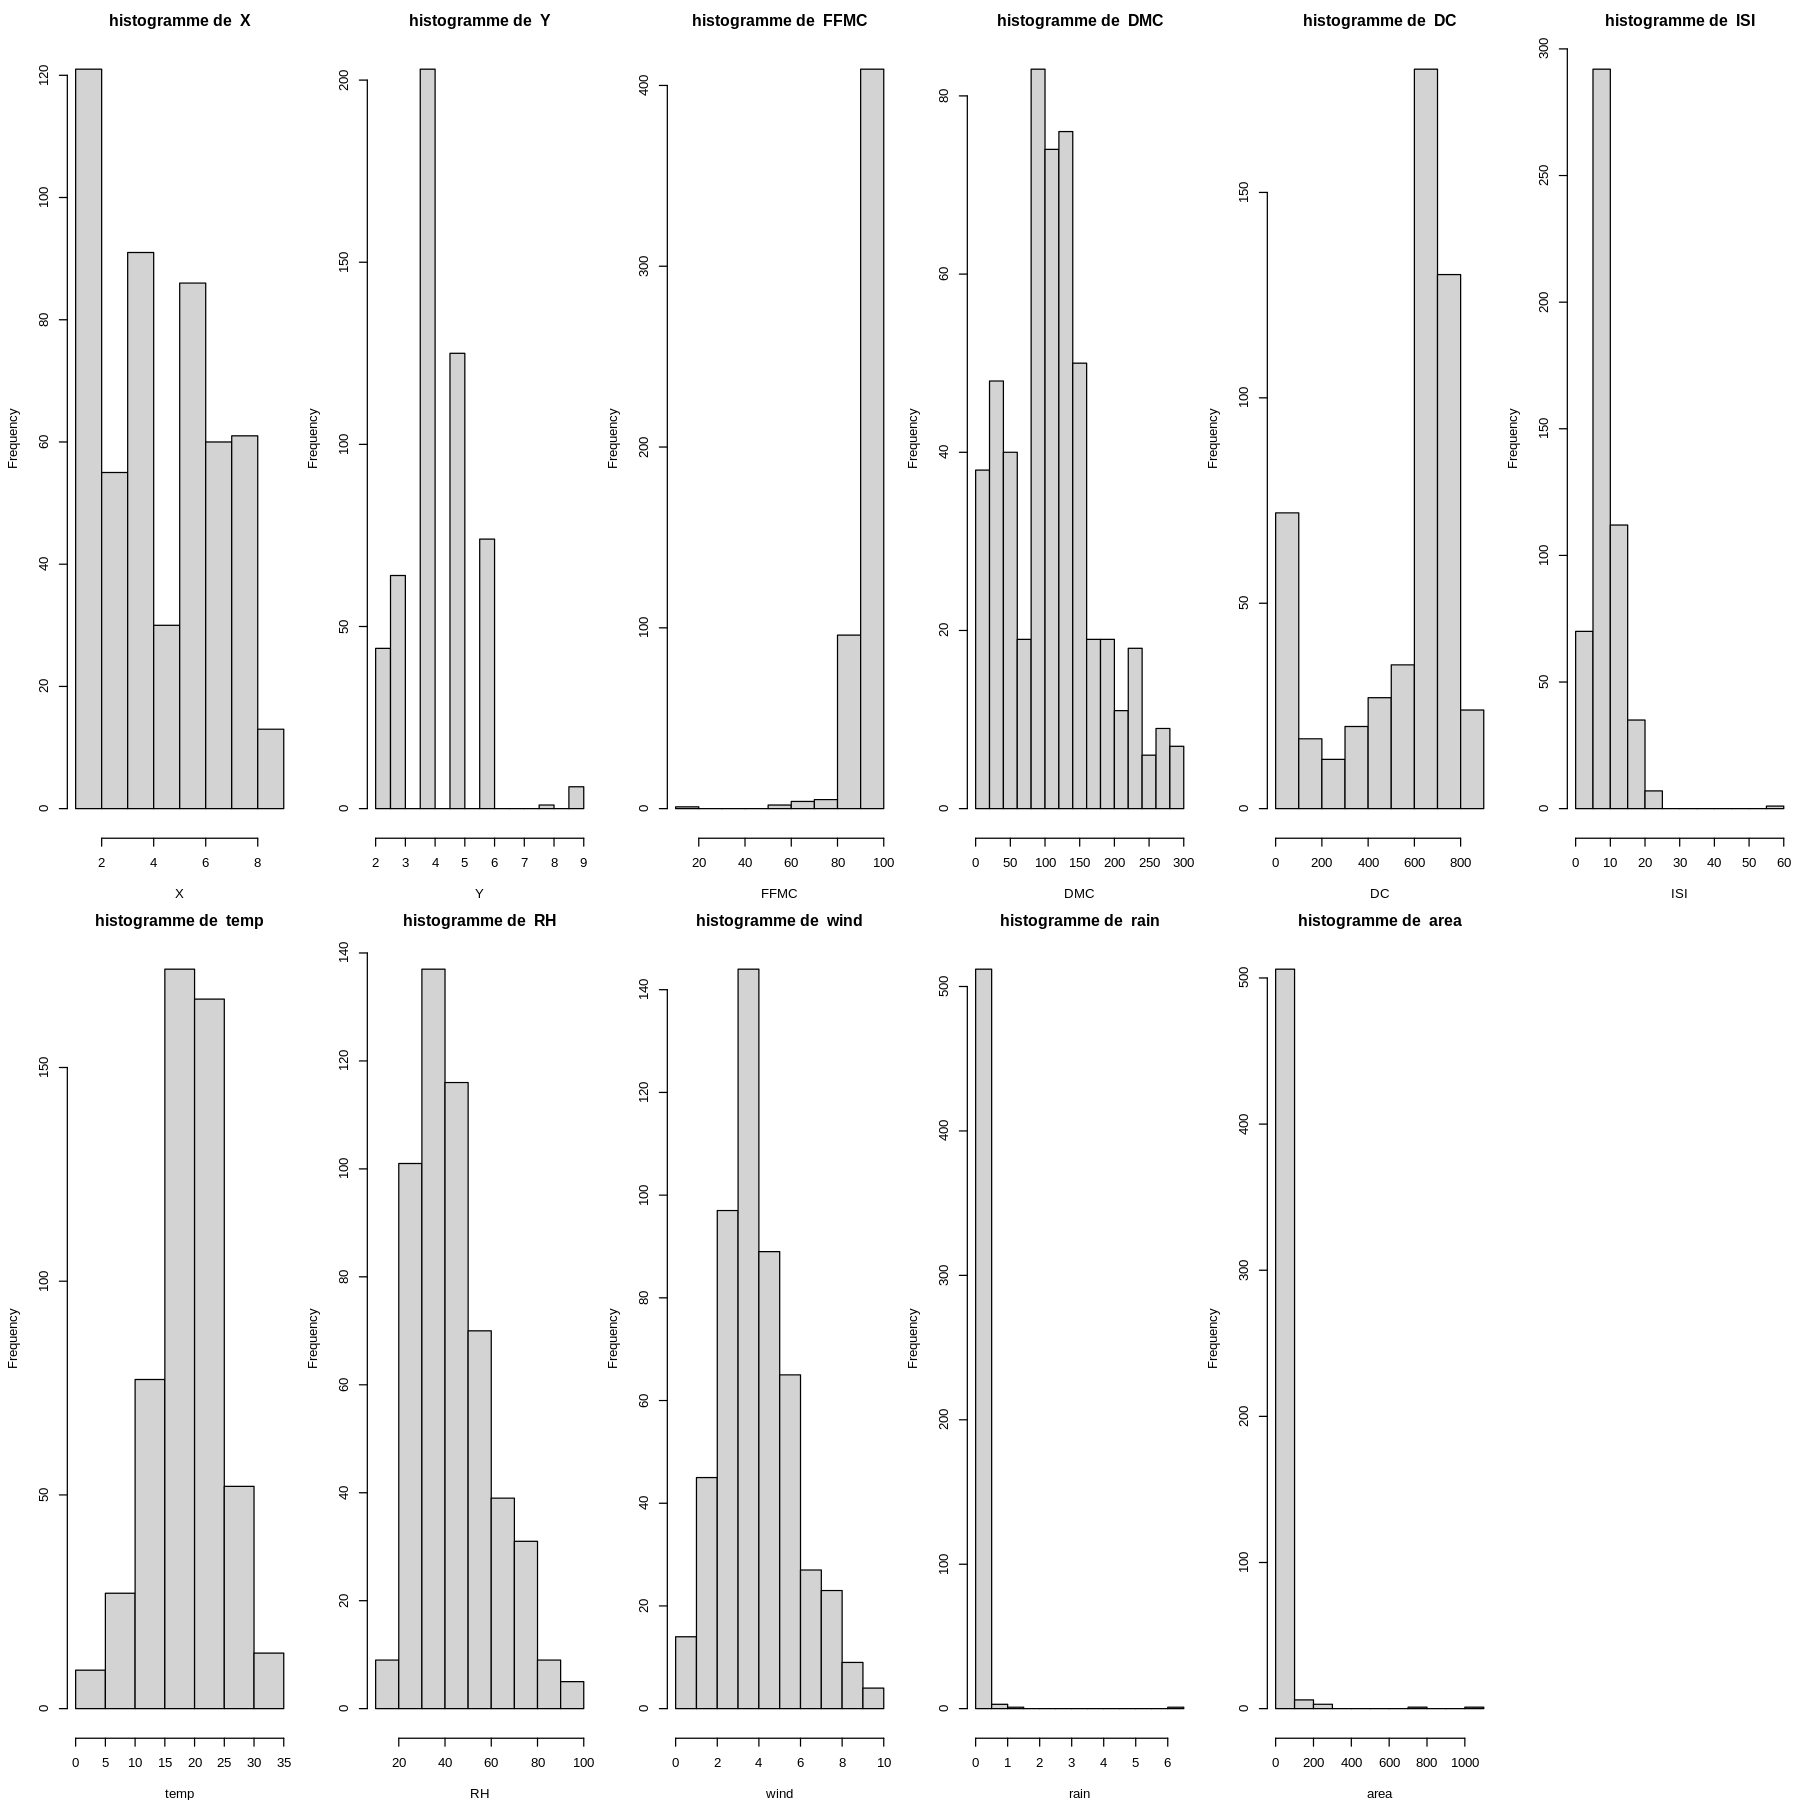

In [26]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow=c(2,6),mar=c(3.90, 4.25, 2.5, 0.5))
for (variable in colnames(df_numeric)){
  hist(df_numeric[[variable]], main = paste('histogramme de ',variable), xlab= variable)}


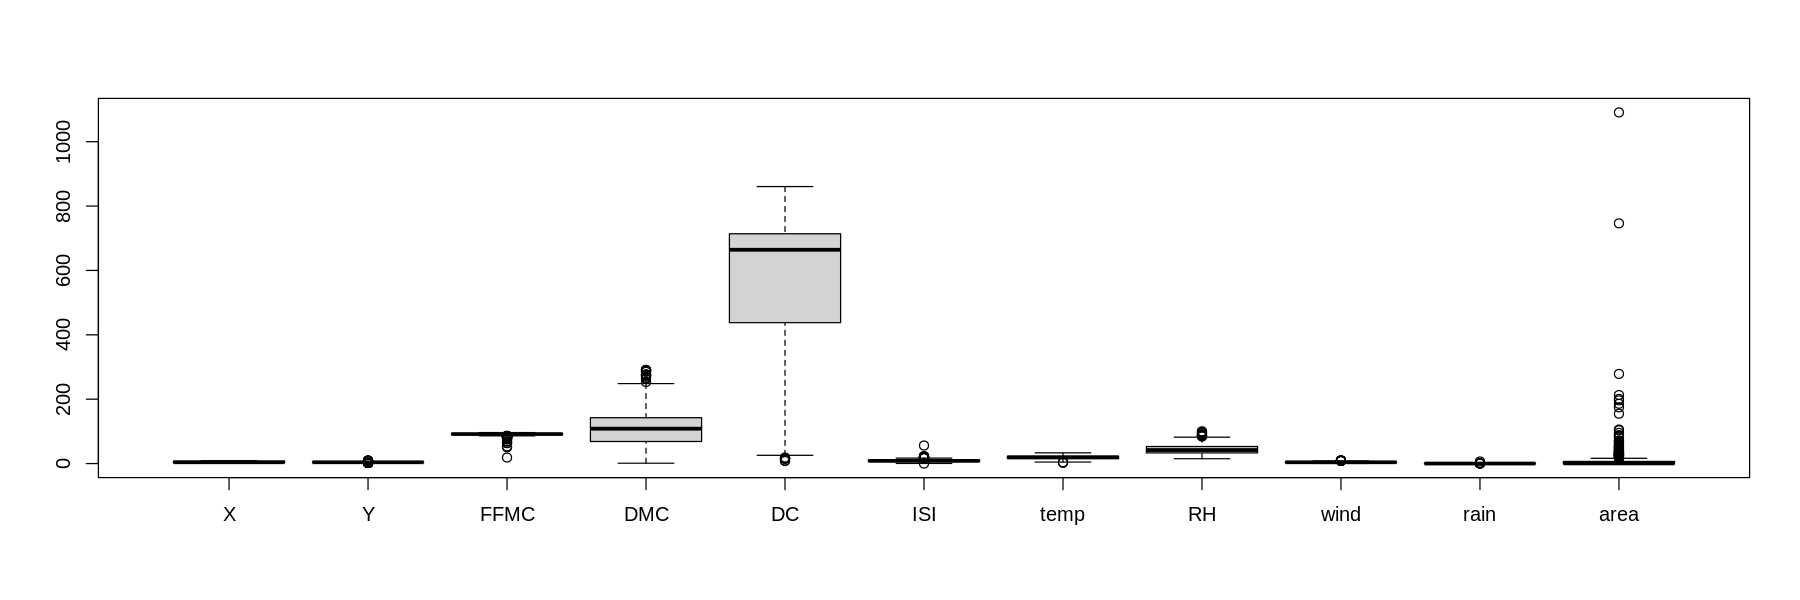

In [27]:
options(repr.plot.width=15, repr.plot.height=5)
boxplot(df_numeric)

## Analyse bi-variée

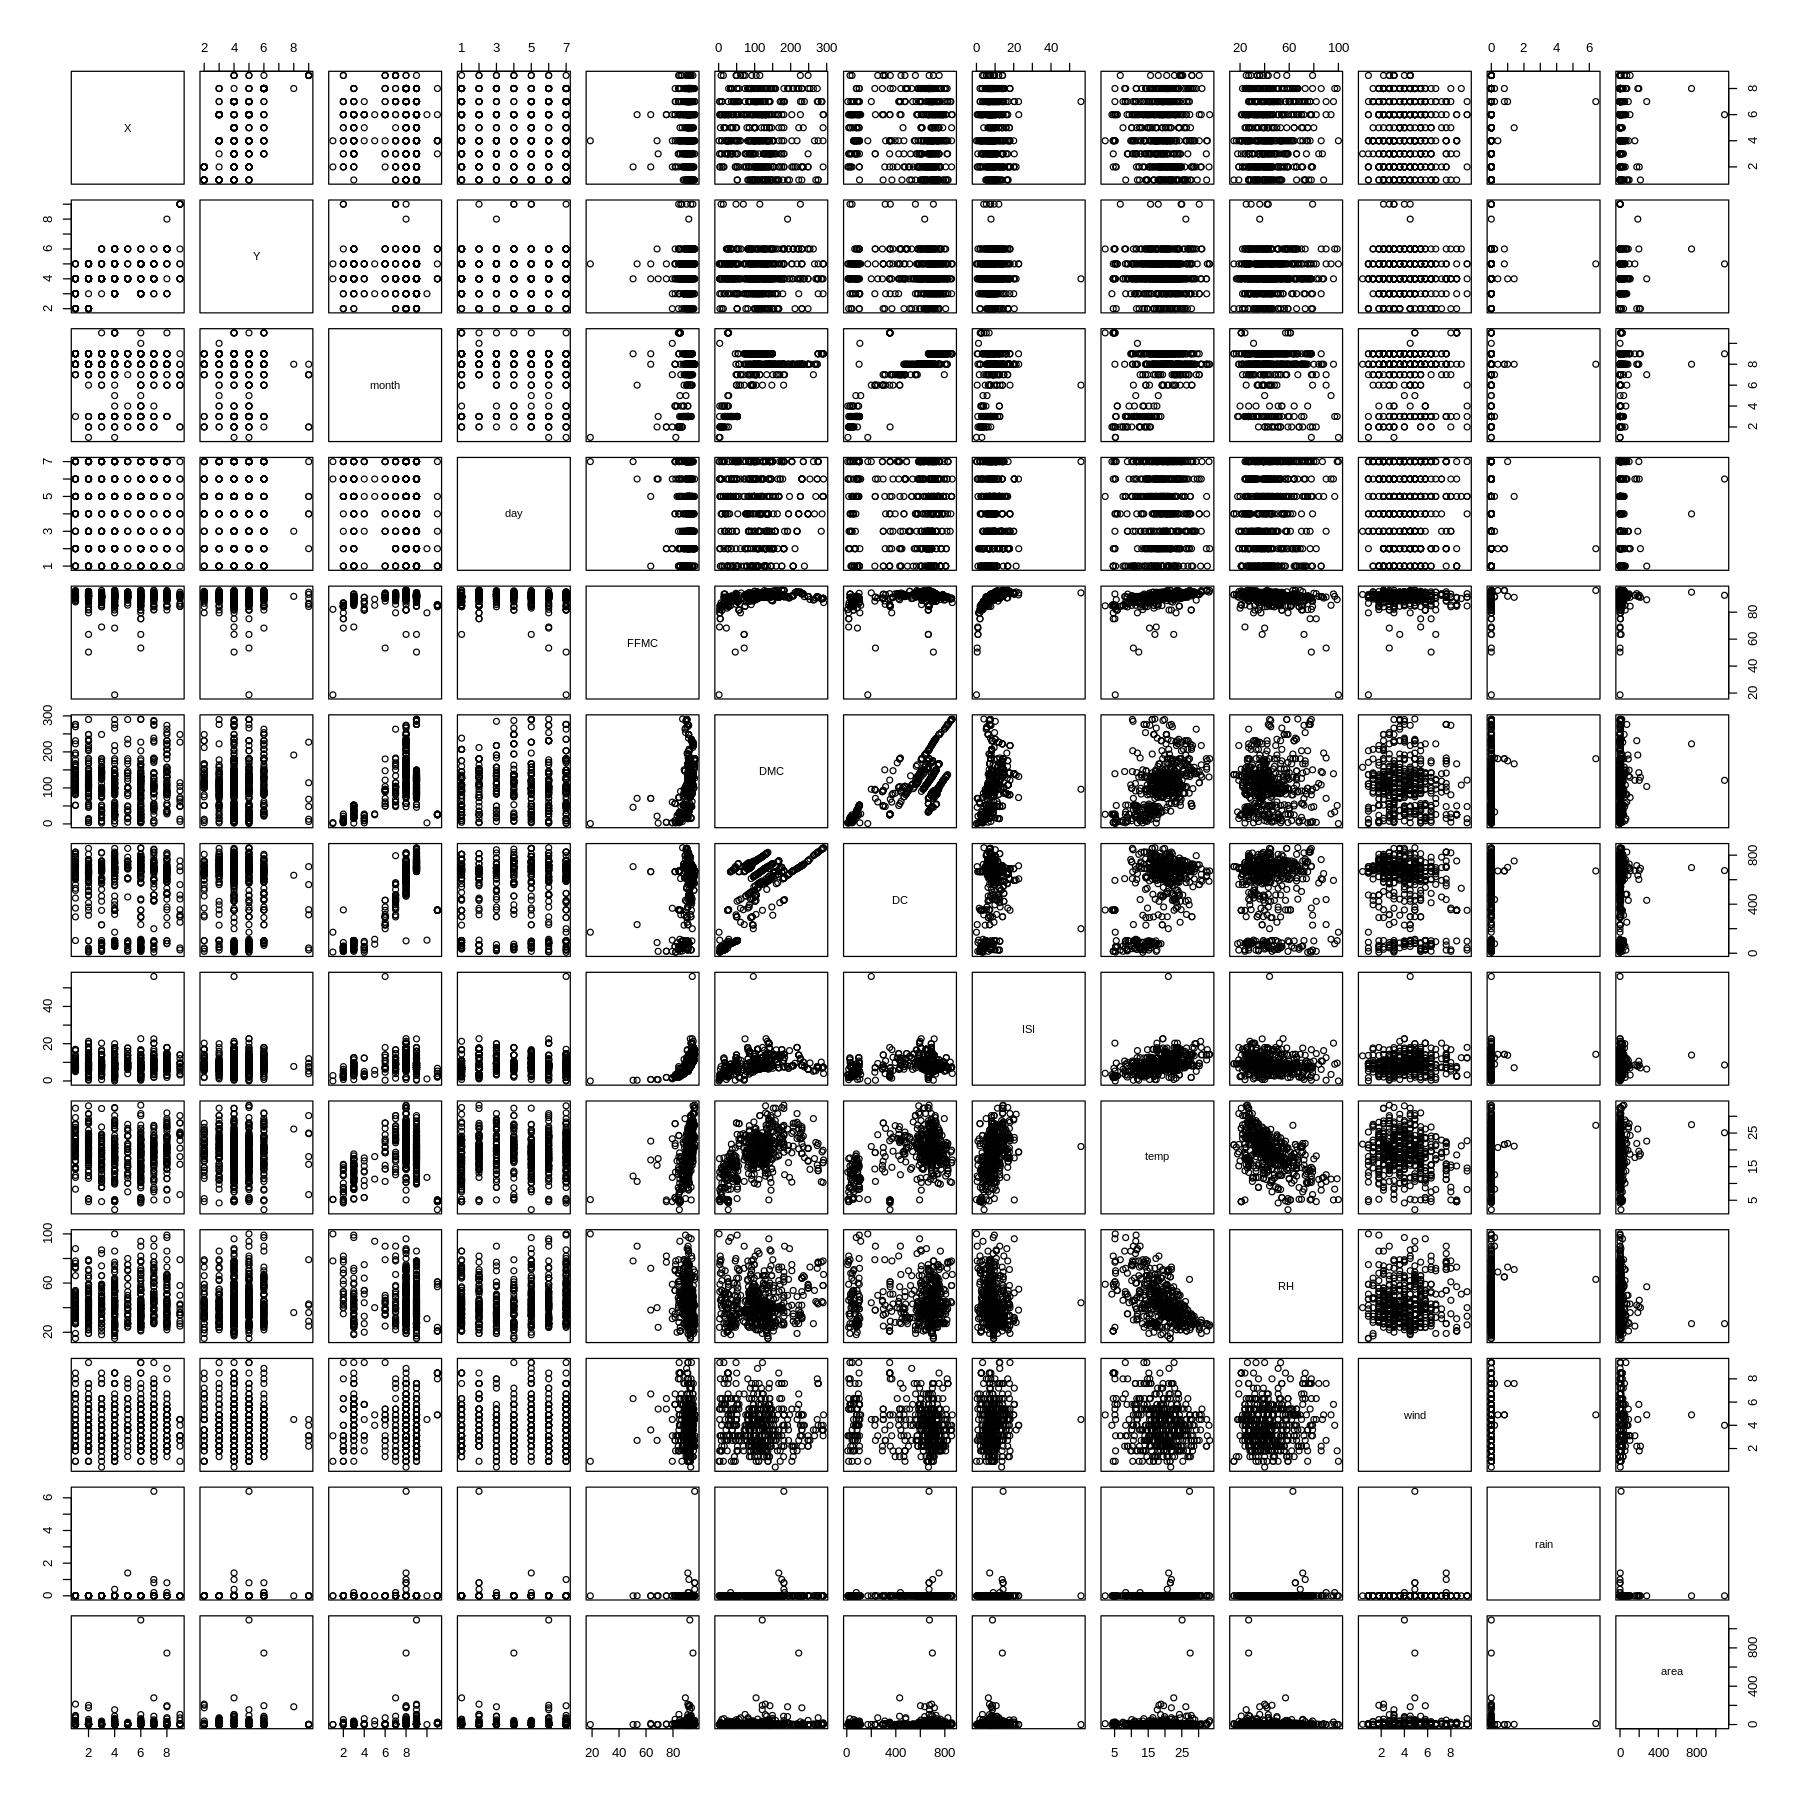

In [28]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(df)

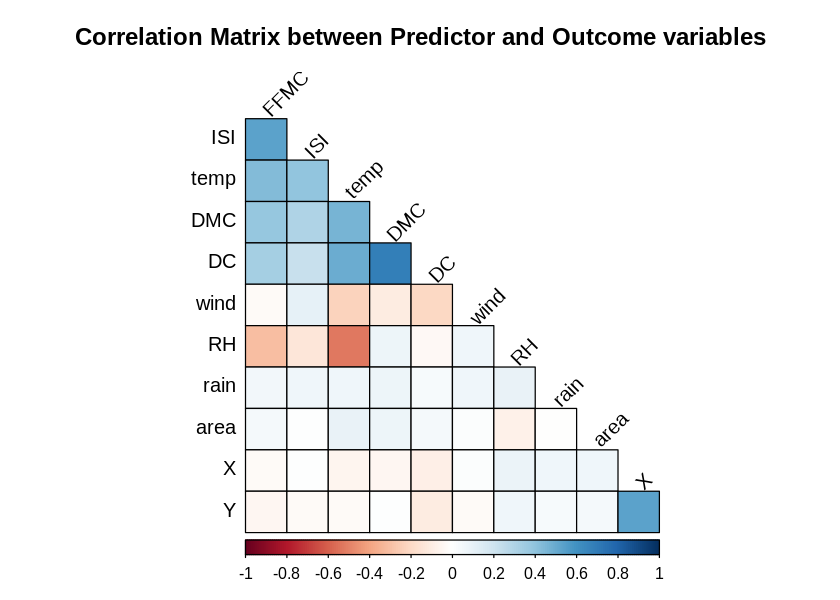

In [30]:
# Remettre une plus petite taille les prochains graphiques
options(repr.plot.width=7, repr.plot.height=5)

install.packages("corrplot") # Ligne pour installer une librairie R (nécéssaire une fois seulement)
library(corrplot) # Ligne pour charger une librairie R (à faire à chaque fois que l'on relance une session R)

M <- cor(df_numeric)
corrplot(M, method="color", outline = TRUE,type="lower",order = "hclust",
         tl.col="black", tl.srt=45, diag=FALSE,tl.cex = 1,mar=c(0,0,3,0),
         title="Correlation Matrix between Predictor and Outcome variables")

### Exercice à savoir faire pour le TP suivant

Nous prenons le jeu de données 'crabs' du TP1 (librairie MASS de
R), importée par

```
library(MASS)
df = crabs
```

#### Questions : 

1. Charger les données depuis la librairie MASS et utiliser une commande pour afficher un résumé des données.

2. Déterminer les variables codées comme qualitatives et les variables codées comme quantitatives.

3. la variable `index` en facteur. Afficher un résumé de cette variable.

4. Changer le nom des niveaux de la variable `sp` en (bleu, orange).

5. Calculer l'étendue  et la médiane de la variable `CW`.

6. Ecrire le code qui permet de tracer un histogramme de `CW` en densité. 

7. Afficher la boîte à moustaches de la variable `CW` et superposer un point de couleur rouge représentant la moyenne de l'échantillon.


### Pour les curieux, installer R en local

Si vous voulez installer R chez vous, il faut aller sur https://cran.r-project.org/ , R est un language libre de droit, open source et donc gratuit. 

Un des IDE les plus répandus de R est `RStudio`, un peu comme `Spyder` pour python. Dans ce cours nous avons choisi d'utiliser `Jupyter` qui a l'avantage d'être plus interactif que `RStudio` et plus léger mais le désavantage d'être moins configurable et moins pratique pour faire des scripts compliqués. Si vous voulez installer `RStudio`, rdv sur https://rstudio.com/ et si vous voulez installer `Jupyter`, il est conseiller d'installer `Anaconda` https://www.anaconda.com/products/individual ce qui installe `Jupyter` puis d'installer `IRKernel` (dans R avec https://irkernel.github.io/installation/ par exemple) qui permet de lancer une session R dans `Jupyter`.